In [ ]:
!pip install easyocr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from IPython.display import Image

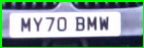

In [ ]:
Image("/content/scaned_img_0.jpg")

In [ ]:
reader = easyocr.Reader(['en'])

In [ ]:
output = reader.readtext('/content/scaned_img_0.jpg')

In [ ]:
output

[([[16, 12], [112, 12], [112, 36], [16, 36]], 'HY7O BMW', 0.188936846056334)]

In [ ]:
text=output[0][-2]
print(text)

HY7O BMW


In [ ]:
cord = output[-1][0]

In [ ]:
cord

[[16, 12], [112, 12], [112, 36], [16, 36]]

In [ ]:
a = list(zip(*cord))
a

[(16, 112, 112, 16), (12, 12, 36, 36)]

In [ ]:
min(a[0])

16

In [ ]:
min(a[1])

12

In [ ]:
max(a[1])

36

In [ ]:
x_min, y_min = [int(min(idx)) for idx in zip(*cord)]

In [ ]:
x_min, y_min

(16, 12)

In [ ]:
x_max, y_max = [int(max(idx)) for idx in zip(*cord)]

In [ ]:
x_max, y_max

(112, 36)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 30

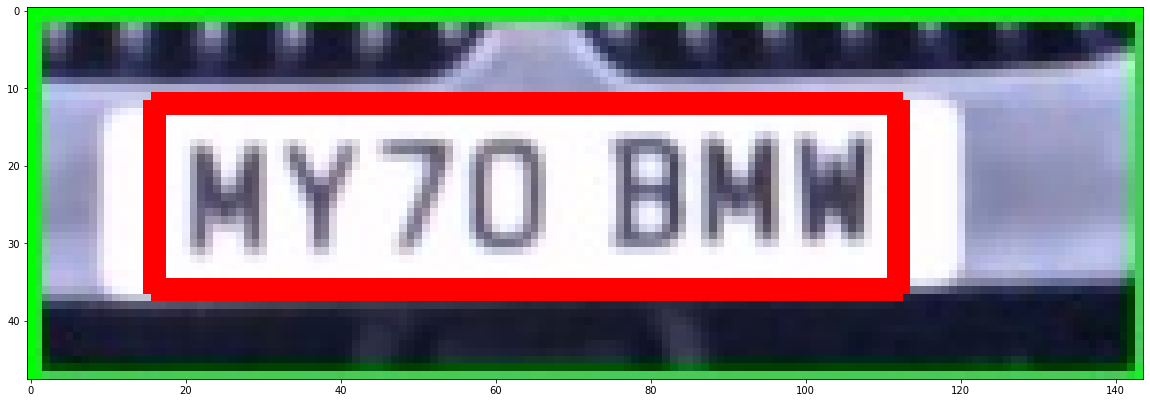

In [ ]:
image = cv2.imread('/content/scaned_img_0.jpg')
cv2.rectangle(image,(x_min,y_min),(x_max,y_max),(0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

save result

In [ ]:
import csv
import uuid
import os


In [ ]:

def save_results(text, csv_filename, folder_path):
    img_name = '{}.jpg'.format(uuid.uuid1())
    
    #cv2.imwrite(os.path.join(folder_path, img_name))
    
    with open(csv_filename, mode='a', newline='') as f:
        csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        csv_writer.writerow([img_name, text])

save_results(text, 'detection_results.csv', r'C:\Users\Avanish\Desktop\Detection_Images') # EDIT FILE LOCATION FOR save_results() HERE